<a href="https://colab.research.google.com/github/EveTLynn/Packt-Data-Analysis-Workshop/blob/main/C5_Analyzing_the_Online_Shopper%E2%80%99s_Purchase_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Step 1: Introduction

Consumer shopping on the internet is growing year by year. However, the conversion rates have remained more or less the same. For example, most of us browse through e-commerce websites such as Amazon, perhaps adding items to a wish list or even an online shopping cart, only to end up buying nothing.
From this common truth comes the need for tools and solutions that can customize promotions and advertisements for online shoppers and improve this conversion. In this chapter, we will be analyzing various factors that affect a purchaser's decision.

The following table shows and describes the various numerical features of the
dataset we are going to use:
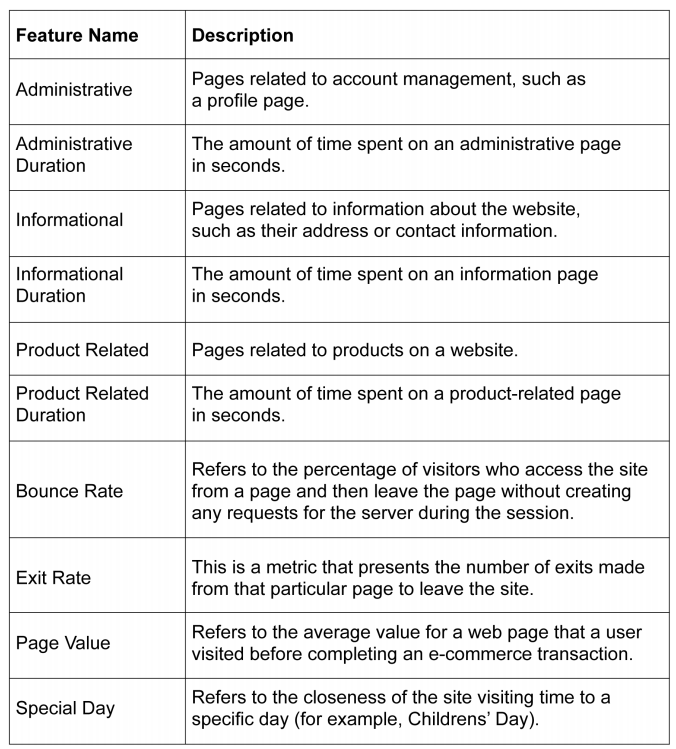

The following table shows and describes the various categorical features of the dataset we are going to use:
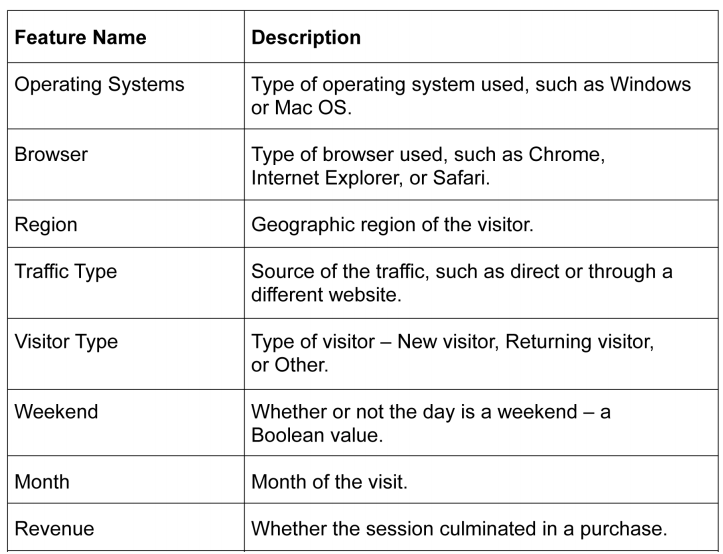

Some information on bounce rate and exit rate:
- Bounce rate is the percentage of visitors who leave a website after viewing only one page. It indicates how frequently users visit your site without interacting or exploring further. While some bounces are unavoidable, a high bounce rate may indicate that your content is unsatisfactory or poorly optimized. A good bounce rate is around 40% or lower, while a bounce rate of 60% or higher may be an indication that you need to evaluate your page content and make it more helpful and engaging for users.

- Exit rate is the percentage of people who leave a particular page after visiting any number of pages on a website.

Read more [here](https://www.semrush.com/blog/bounce-rate/).

# Step 2: Import data and libraries

In [ ]:
!pip install imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
# ggplot 2 style
import matplotlib as mpl
mpl.style.use(['ggplot'])

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter05/Datasets/online_shoppers_intention.csv")

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# check for nulls
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Step 3: Exploratory Data Analysis

## 3.1. Univariate analysis

Univariate analysis is the simplest form of analysis and is where we analyze each feature (column of a DataFrame) and try to uncover the pattern or distribution of the
data. In this section, we will be looking at the following features:
- Revenue column
- Visitor type
- Traffic type
- Region
- Weekend-wise distribution
- Browser and operating system
- Administrative page
- Information page
- Special day

### 3.1.1. Baseline Conversion Rate from the Revenue Column
This feature simply refers to how many of the online shopping sessions ended in
a purchase.

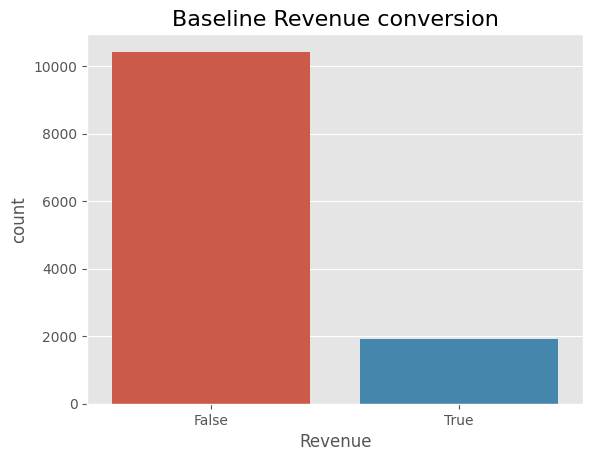

In [ ]:
sns.countplot(data=df, x='Revenue')
plt.title('Baseline Revenue conversion', fontsize = 16)
plt.show()

In [ ]:
print(df['Revenue'].value_counts())
print()
print(df['Revenue'].value_counts(normalize=True))

False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


As you can see from the preceding data, a total of 1,908 customers ended up making a purchase, while 10,422 customers did not.

The baseline conversion rate of online visitors versus overall visitors is a ratio between the total number of online sessions that led to a purchase divided by the total number of sessions. This is calculated as follows:

In [ ]:
1908/12330 * 100

15.474452554744525

The conversion rate is 15.47%.

### 3.1.2. Visitor-Wise Distribution

Now, let's look at the distribution of visitors to the website. We want to determine which visitor type is most frequent—whether this is new visitors, returning visitors, or any other category

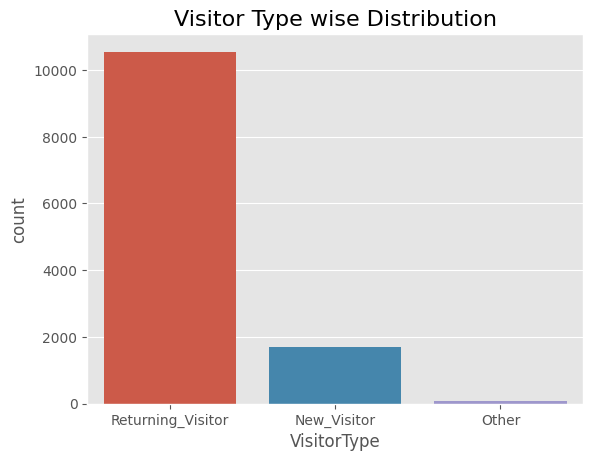

In [ ]:
sns.countplot(data=df, x='VisitorType')
plt.title('Visitor Type wise Distribution', fontsize = 16)
plt.show()

In [ ]:
#calculation exact number of each visitor type
print(df['VisitorType'].value_counts())
print()
print(df['VisitorType'].value_counts(normalize=True))

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64


We can see that the number of returning customers is higher than that of new visitors. This is good news as it means we have been successful in attracting customers back to our website.

### 3.1.3. Traffic-Wise Distribution

Now, let's consider the distribution of traffic. We want to find out how the visitors visit our page to determine what amount of site traffic is accounted for by direct visitors (meaning they enter the URL into the browser) and how much is generated through other mediums, such as blogs or advertisements.

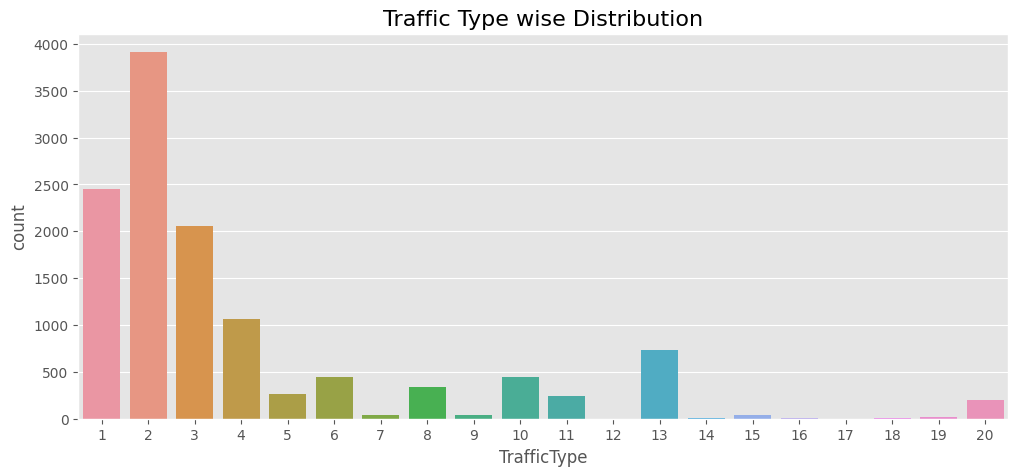

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='TrafficType')
plt.title('Traffic Type wise Distribution', fontsize = 16)
plt.show()

In [ ]:
print(df['TrafficType'].value_counts(normalize=True))

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64


We can see that sources 2, 1, 3, and 4 account for the majority of our web traffic.

### 3.1.4. Analyzing the Distribution of Customers Session on the Website

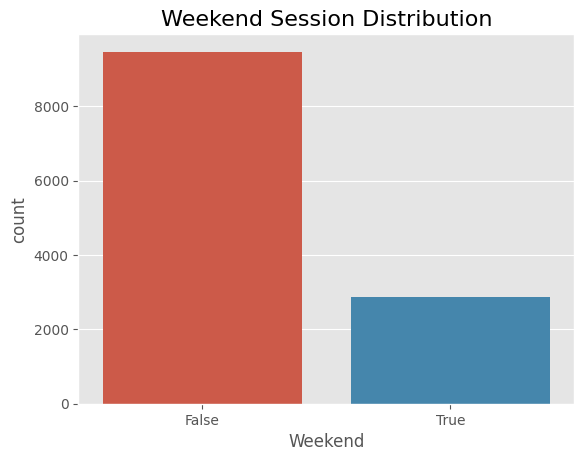

In [ ]:
sns.countplot(data=df, x='Weekend')
plt.title('Weekend Session Distribution', fontsize = 16)
plt.show()

In [ ]:
print(df['Weekend'].value_counts())
print()
print(df['Weekend'].value_counts(normalize=True))

False    9462
True     2868
Name: Weekend, dtype: int64

False    0.767397
True     0.232603
Name: Weekend, dtype: float64


We can see that more visitors visit during weekdays than weekend days.

### 3.1.5. Region-Wise Distribution

Since we need to analyze many columns, let write a function to reduce the repetition of code

In [ ]:
def column_distribution(col_name, data=df):
    sns.countplot(data=data, x=col_name)
    plt.title(f'{col_name} Distribution', fontsize = 16)
    plt.show()

def count_values(col_name, data=df):
    print(f"Value counts for {col_name}")
    print(data[col_name].value_counts())
    print()
    print(data[col_name].value_counts(normalize=True))

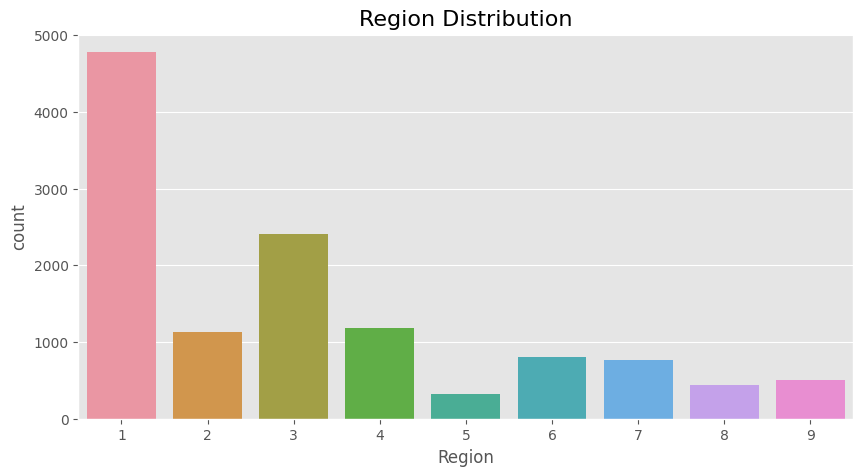

Value counts for Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64


In [ ]:
plt.figure(figsize=(10,5))
column_distribution('Region')
count_values('Region')

The numbers 1, 2, and so on represent the different regions that the data is sourced from. We can see that Region 1 has the highest number of visitors visiting our website.
Regions 1 and 3 account for 50% of online sessions; thus, we can infer that regions 1 and 3 are where most potential consumers reside. With this information, we can target our marketing campaigns better.

### 3.1.6. Distribution of brower, os, Administrative Pageview, Administrative Pageview, Special Day Session

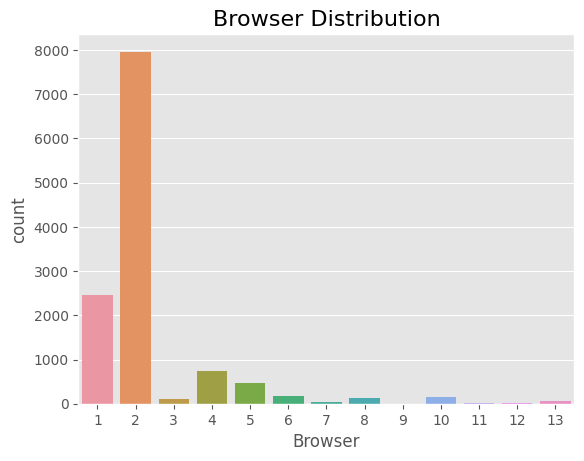

Value counts for Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64


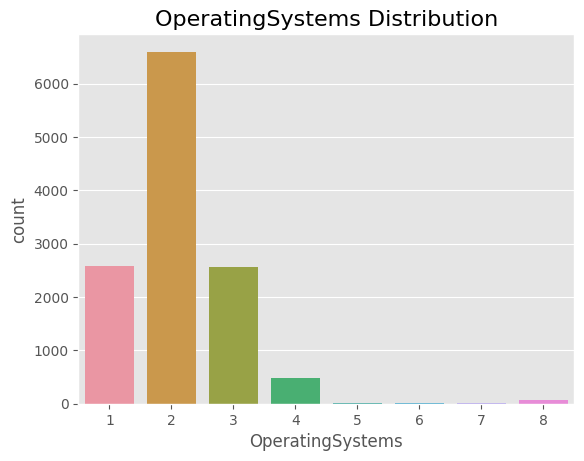

Value counts for OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64


In [ ]:
column_distribution('Browser')
count_values('Browser')
column_distribution('OperatingSystems')
count_values('OperatingSystems')

### 3.1.7. Distribution of Administrative Pageview, Administrative Pageview

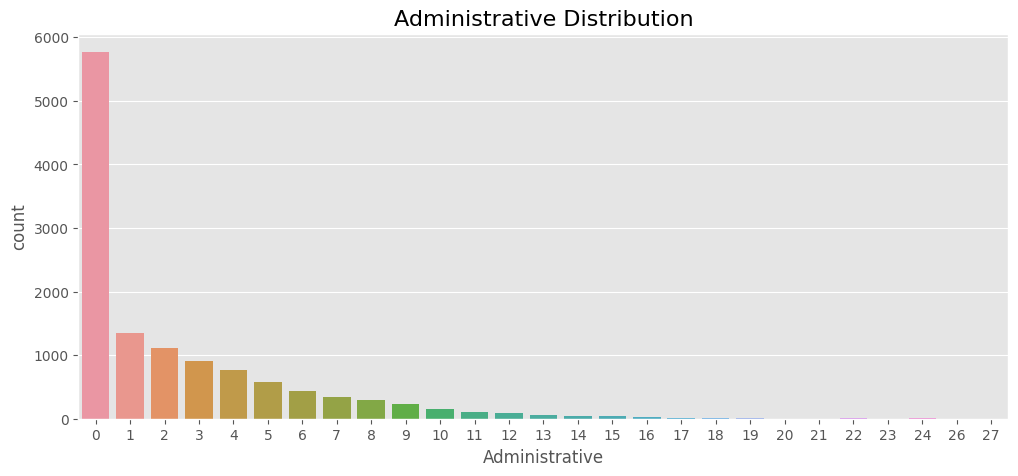

Value counts for Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64

0     0.467802
1     0.109813
2     0.090349
3     0.074209
4     0.062044
5     0.046634
6     0.035036
7     0.027413
8     0.023277
9     0.018248
10    0.012409
11    0.008516
12    0.006975
13    0.004542
14    0.003569
15    0.003082
16    0.001946
17    0.001298
18    0.000973
19    0.000487
24    0.000324
22    0.000324
23    0.000243
21    0.000162
20    0.000162
27    0.000081
26    0.000081
Name: Administrative, dtype: float64


In [ ]:
plt.figure(figsize=(12,5))
column_distribution('Administrative')
count_values('Administrative')

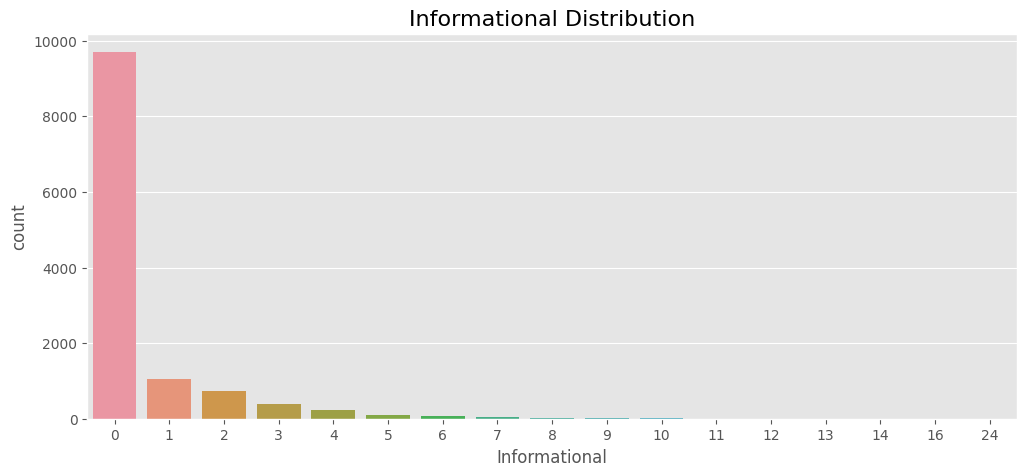

Value counts for Informational
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64

0     0.786618
1     0.084428
2     0.059043
3     0.030819
4     0.018005
5     0.008029
6     0.006326
7     0.002920
9     0.001217
8     0.001135
10    0.000568
12    0.000406
14    0.000162
16    0.000081
11    0.000081
24    0.000081
13    0.000081
Name: Informational, dtype: float64


In [ ]:
plt.figure(figsize=(12,5))
column_distribution('Informational')
count_values('Informational')

### 3.1.8. Distribution of Special Day Session

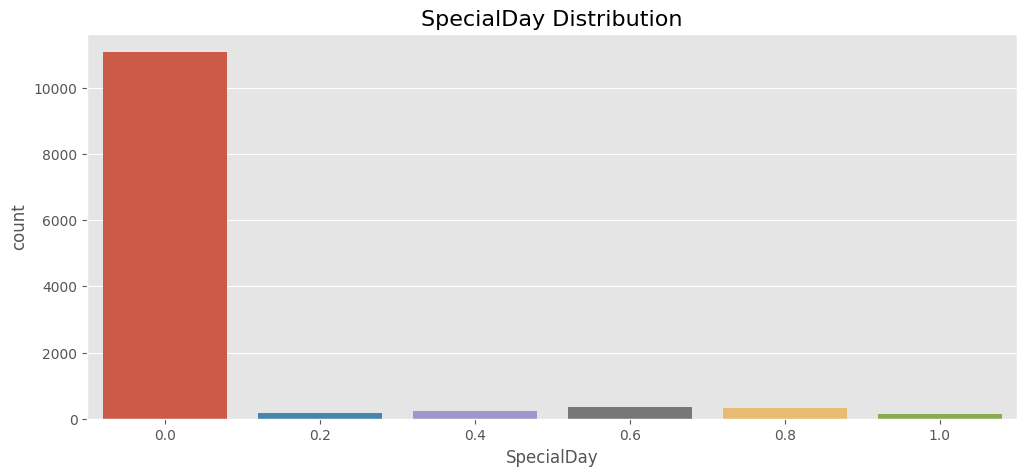

Value counts for SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

0.0    0.898540
0.6    0.028467
0.8    0.026358
0.4    0.019708
0.2    0.014436
1.0    0.012490
Name: SpecialDay, dtype: float64


In [ ]:
plt.figure(figsize=(12,5))
column_distribution('SpecialDay')
count_values('SpecialDay')

## 3.2. Bivariate analysis

In this section, we will be focusing on bivariate analysis. Bivariate analysis is performed between two variables to look at their relationship—for example, to determine which type of browser leads to a successful transaction, or which region has the highest number of customers who ended up making a transaction. We will be performing bivariate analysis between the revenue column and the following categories:
- Visitor type
- Traffic type
- Region
- Browser type
- Operating system
- Month
- Special day

### 3.2.1. Revenue Versus Visitor Type

We will be plotting a categorical plot between Revenue and VisitorType. The categorical plot gives you the number of users in each subcategory, and whether each culminated in a purchase. The plot will define those users who did make a purchase as True, and those who did not as False:

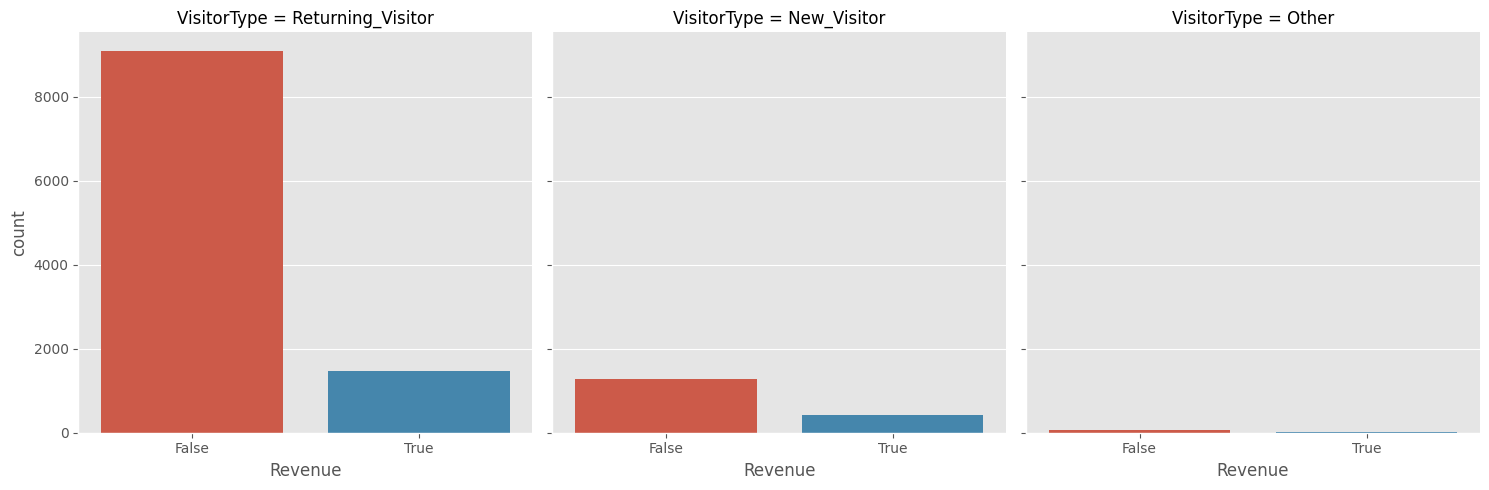

In [ ]:
g = sns.catplot(x="Revenue", col="VisitorType", col_wrap=3, data=df, kind="count", height=5, aspect=1)
plt.show()

More revenue conversions happen for returning customers than new customers. This clearly implies that we need to find ways to incentivize new customers to make a transaction with us.

### 3.2.2. Revenue Versus Traffic Type

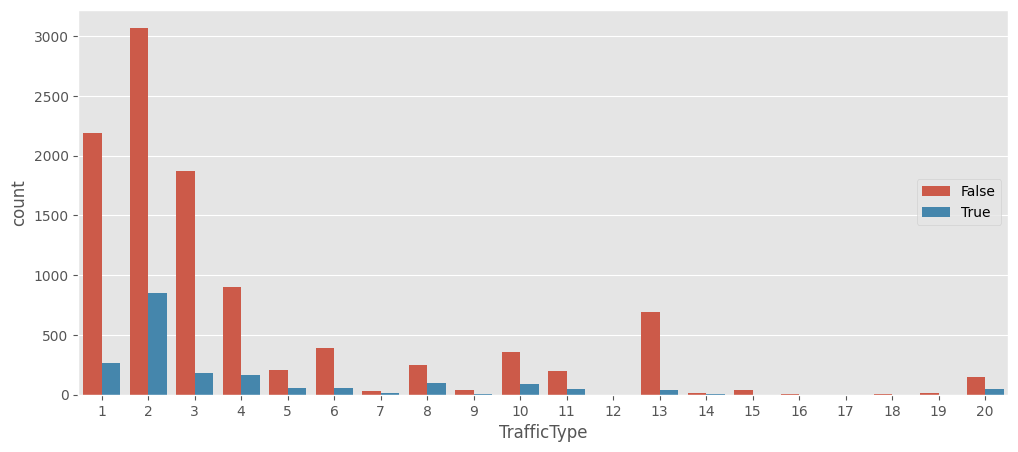

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

We can see that more revenue conversion happens for web traffic generated from source 2. Even though source 13 generated a considerable amount of web traffic, conversion is very low compared to others.

### 3.2.3.  Analyzing the Relationship between Revenue and Other Variables

Just do the same: check this [notebook](https://github.com/PacktWorkshops/The-Data-Analysis-Workshop/blob/master/Chapter05/Exercise5.03/Exercise5.03.ipynb) for the plots.

## 3.3 Linear relationships

Basically, the book plot scatter plot between these varibales to see if there's any linear relationship: Bounce rate versus exit rate
- Page value versus bounce rate
- Page value versus exit rate
- Impact of administration page views and administrative pageview duration
on revenue
- Impact of information page views and information pageview duration
on revenue

Let's not plot scatter plot here, instead I'll use correlation matrix.

In [4]:
plot_data = df[['PageValues', 'BounceRates', 'ExitRates', 'Administrative', 'Administrative_Duration',
                'Informational', 'Informational_Duration']].corr()
plot_data.style.background_gradient(cmap='coolwarm').set_precision(2)

,PageValues,BounceRates,ExitRates,Administrative,Administrative_Duration,Informational,Informational_Duration
PageValues,1.00,-0.12,-0.17,0.10,0.07,0.05,0.03
BounceRates,-0.12,1.00,0.91,-0.22,-0.14,-0.12,-0.07
ExitRates,-0.17,0.91,1.00,-0.32,-0.21,-0.16,-0.11
Administrative,0.10,-0.22,-0.32,1.00,0.60,0.38,0.26
Administrative_Duration,0.07,-0.14,-0.21,0.60,1.00,0.30,0.24
Informational,0.05,-0.12,-0.16,0.38,0.30,1.00,0.62
Informational_Duration,0.03,-0.07,-0.11,0.26,0.24,0.62,1.00


From the matrix we can see that:
- There's a strong positive correlation between Bounce rate and Exit rate
- Page Value has slight negative correlation to both bounce rate and Exit Rate.
-  Administrative-related pageviews and the administrative-related pageview duration are positively correlated.
- Information page views and information pageview duration are positively correlated.

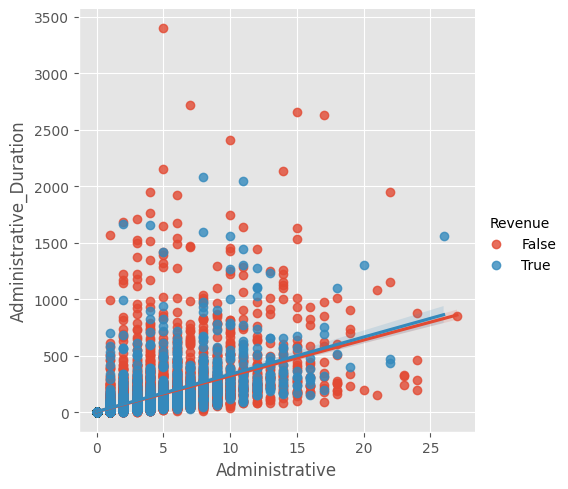

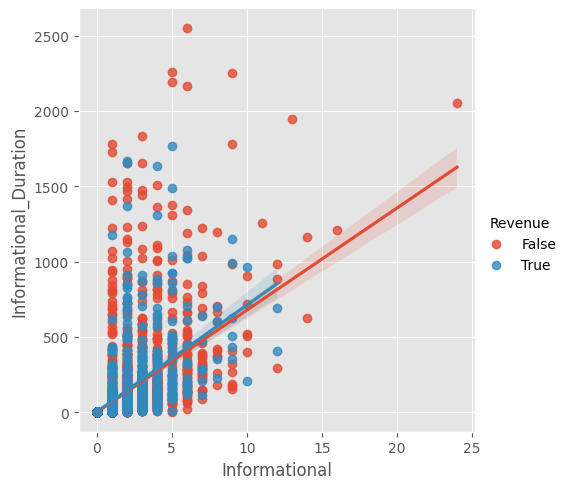

In [9]:
# lmplot with Revnue as hue
sns.lmplot(x="Administrative", y="Administrative_Duration",hue='Revenue', data=df)

sns.lmplot(x="Informational", y="Informational_Duration",hue='Revenue', data=df)

From the plot, we can see that: Customers who have made online purchases visited fewer numbers of informational pages. This implies that informational pageviews don't have much effect on revenue generation.

# Step 4: K-means Clustering

## 4.1 Informational Duration versus Bounce Rate

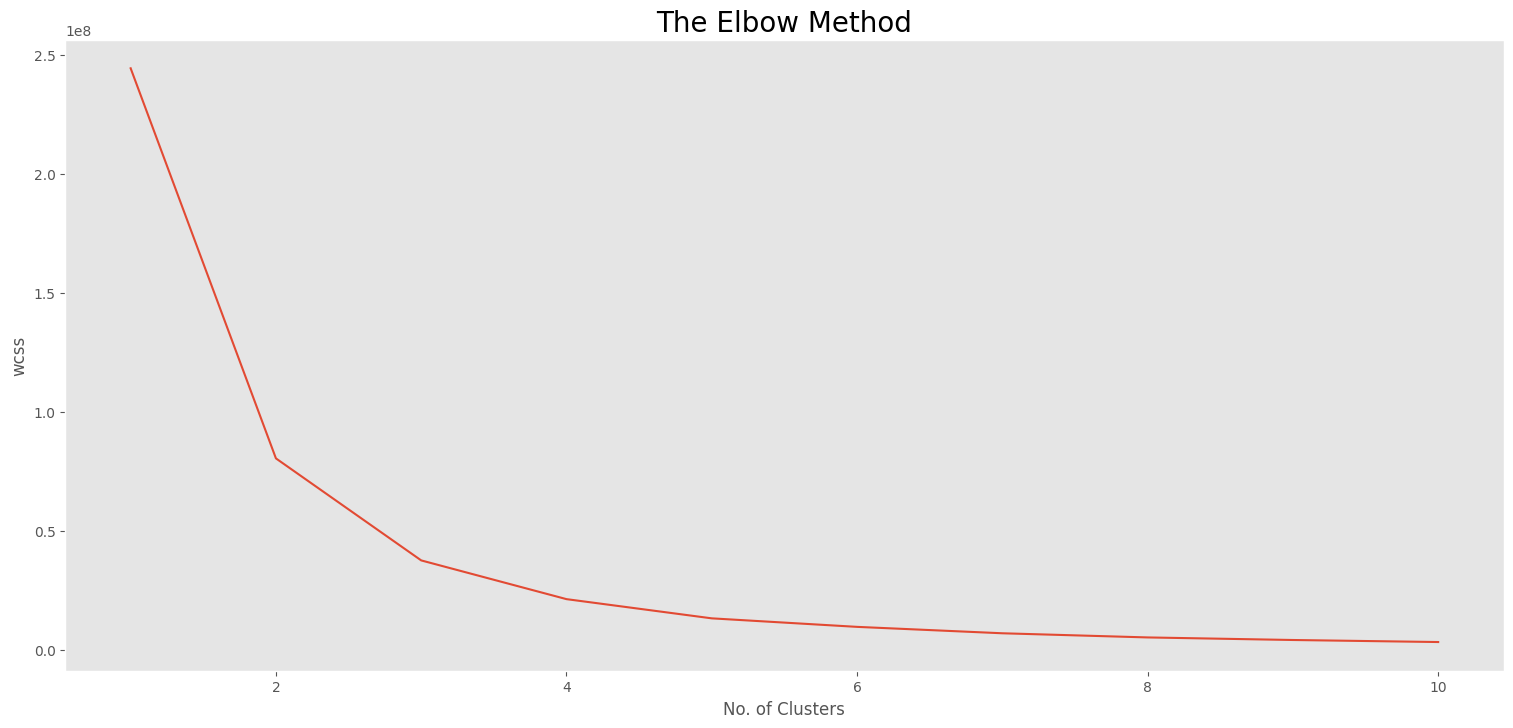

In [ ]:
# elect the columns and assign them to a variable called x
x = df.iloc[:, [3, 6]].values

wcss = []
# Km: k-means clustering algorithm. Run the km for different values of k (1-10)
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    # fit the k-means algorithm to the x
    km.fit(x)
    labels = km.labels_
    # append the inertia value we calculated using Kmeans to wcss
    wcss.append(km.inertia_)

# plot the value of wcss with the value of k
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

To make the graph more readable, assign the color pink for uninterested
customers (in which Revenue is False), yellow for target customers (in which Revenue is True), and blue for the centroid of the clusters

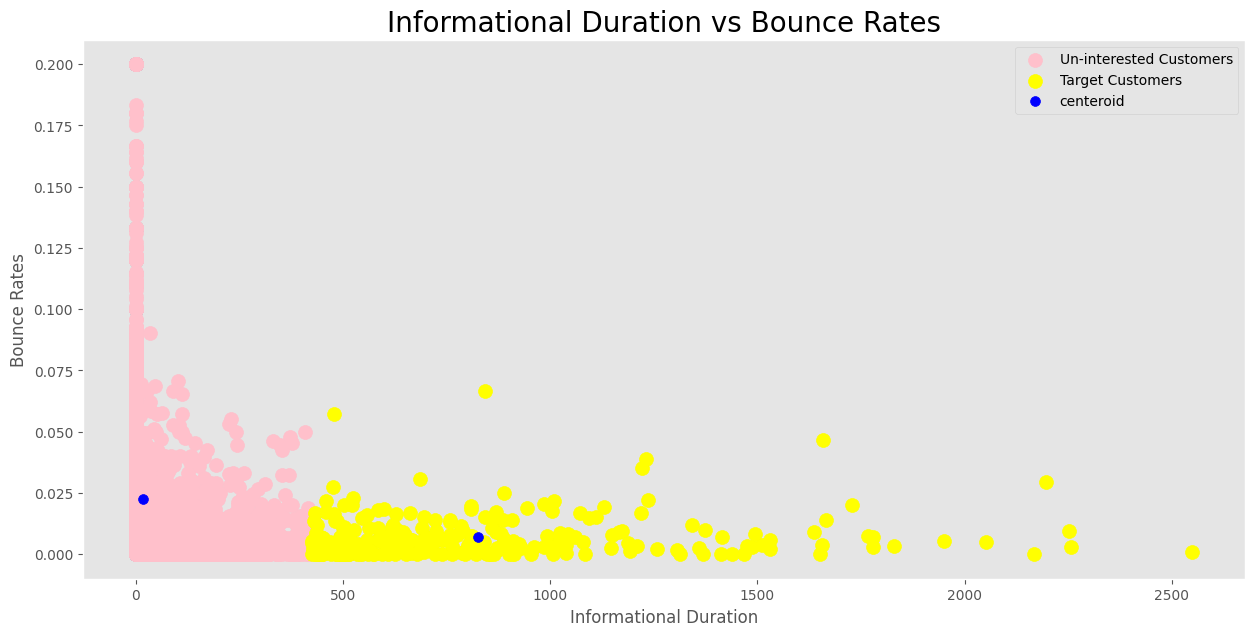

In [ ]:
# run kmeans with 2 clusters
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# predict y (in this case 2 clusters mean 2 labels 0 and 1)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

We would want to target the customer with high information duration and low bounce rate. From the preceding graph, we can see that our target customers spend around 850-900 seconds on average on the Information page.

## 4.2  Informational Duration versus Exit Rate

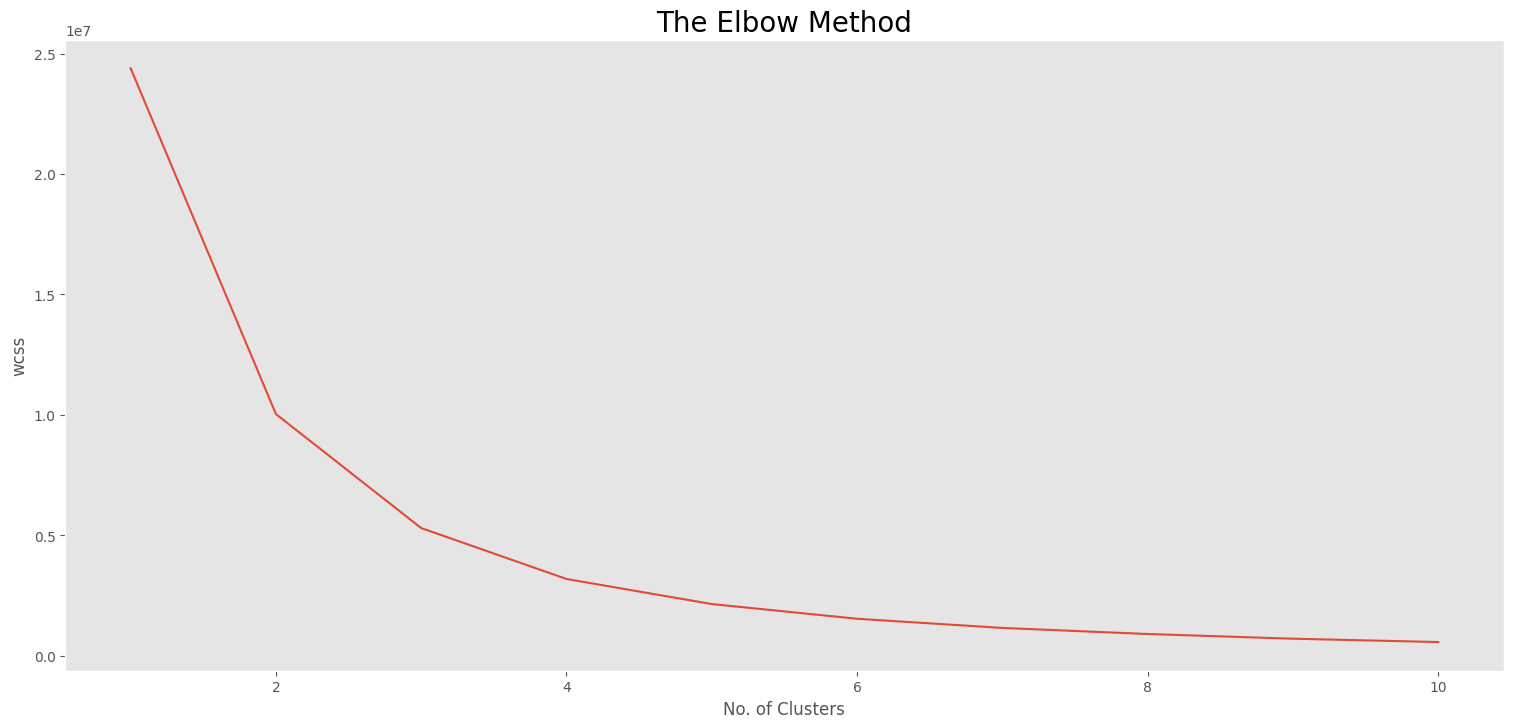

In [10]:
# elect the columns and assign them to a variable called x
x = df.iloc[:, [4, 7]].values

wcss = []
# Km: k-means clustering algorithm. Run the km for different values of k (1-10)
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    # fit the k-means algorithm to the x
    km.fit(x)
    labels = km.labels_
    # append the inertia value we calculated using Kmeans to wcss
    wcss.append(km.inertia_)

# plot the value of wcss with the value of k
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

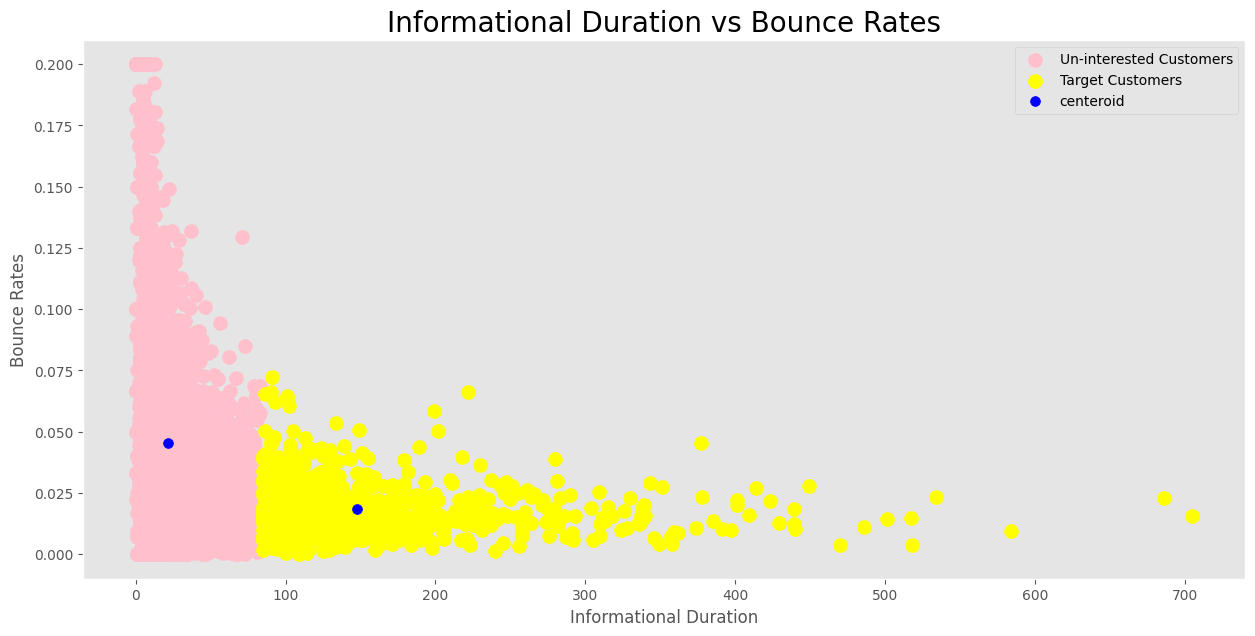

In [11]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

From the preceding cluster, we can infer that our target customers spend around 150 seconds more on average than the other customers before exiting.

## 4.3 Administrative Duration versus Bounce Rate and Administrative Duration versus Exit Rate

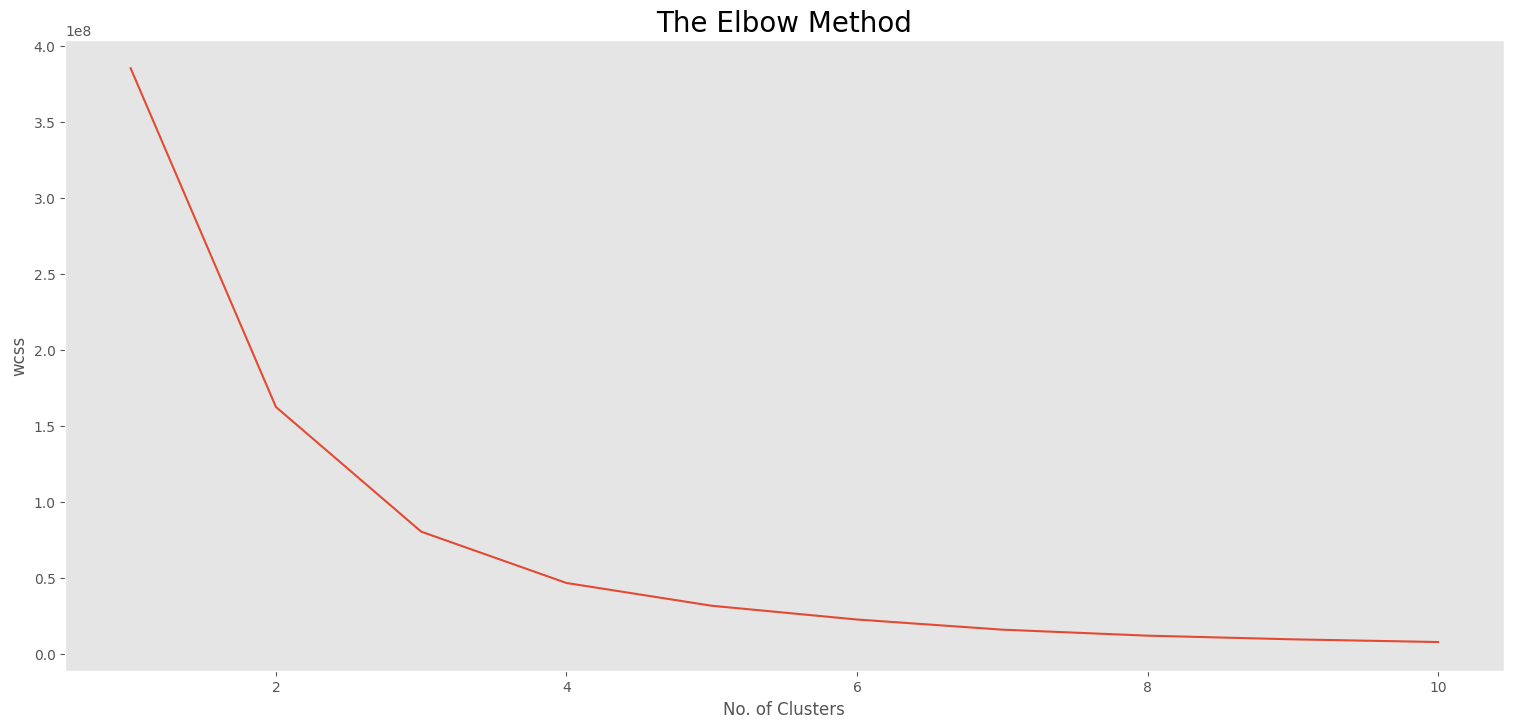

In [12]:
# Administrative duration vs Bounce Rate
x = df.iloc[:, [1, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

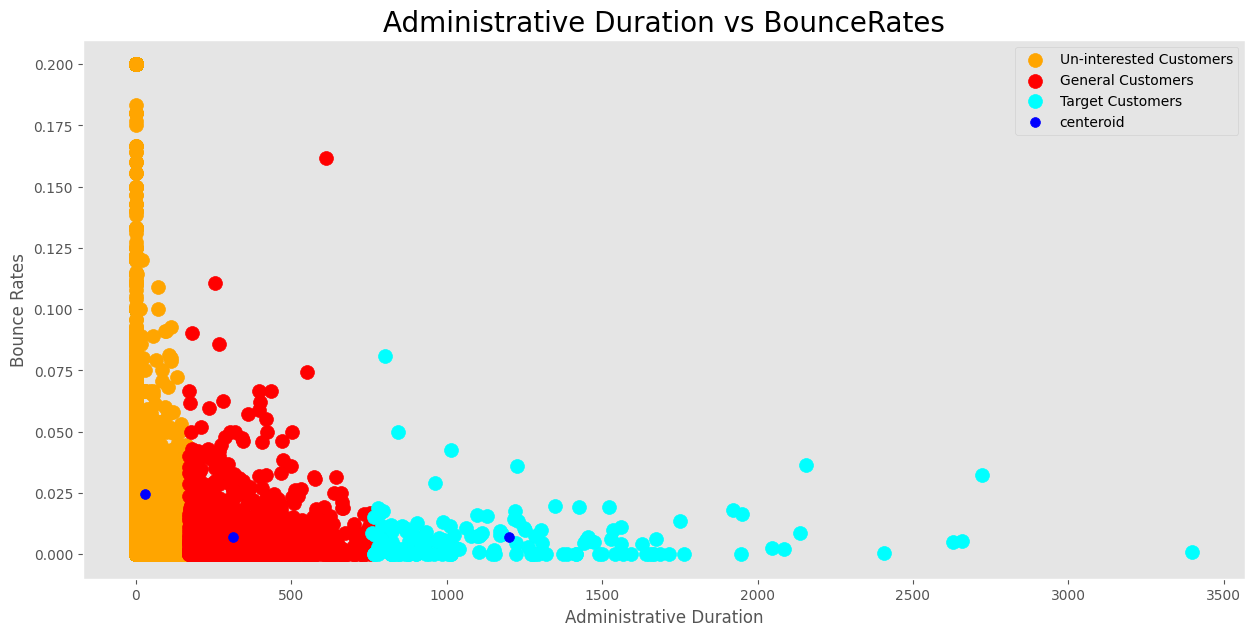

In [13]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.title('Administrative Duration vs BounceRates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

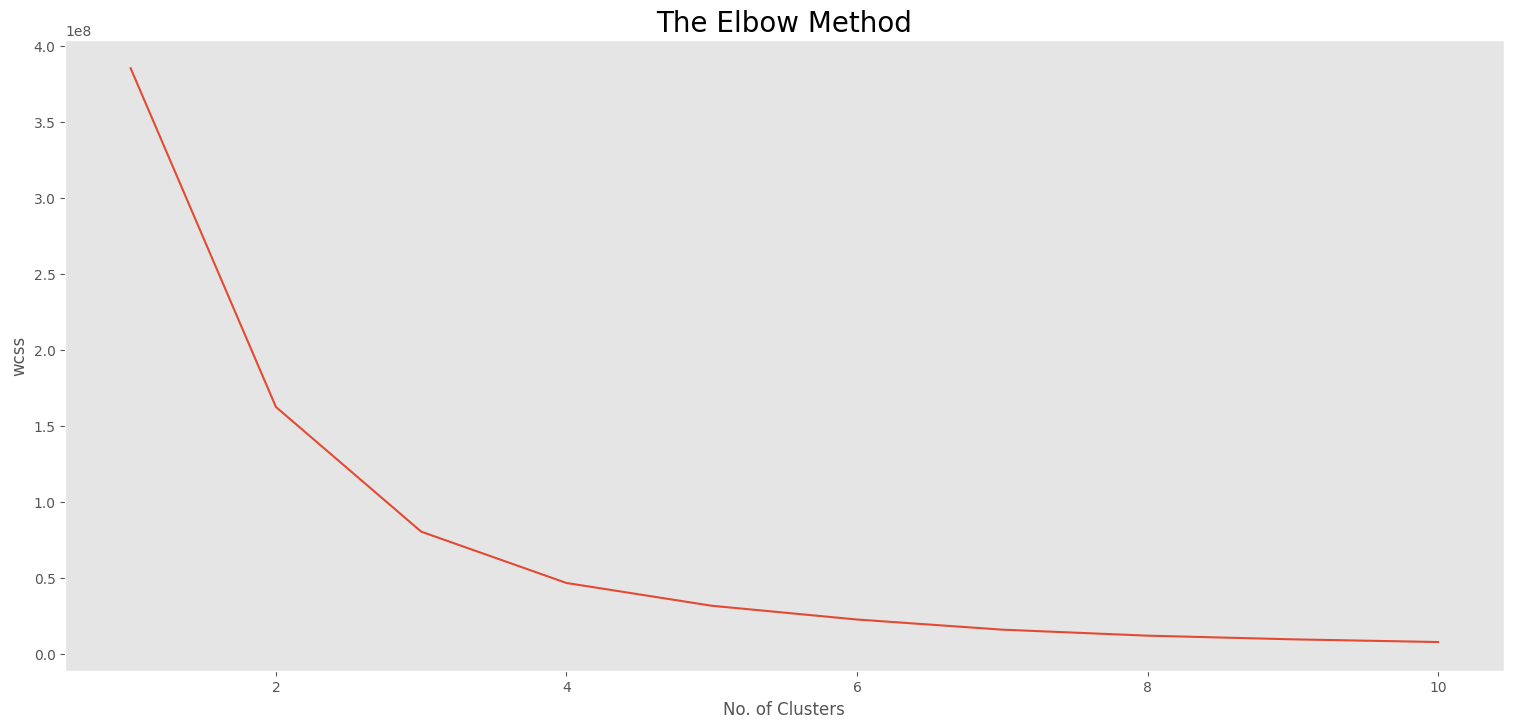

In [14]:
# Administrative duration vs Exit Rate
x = df.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

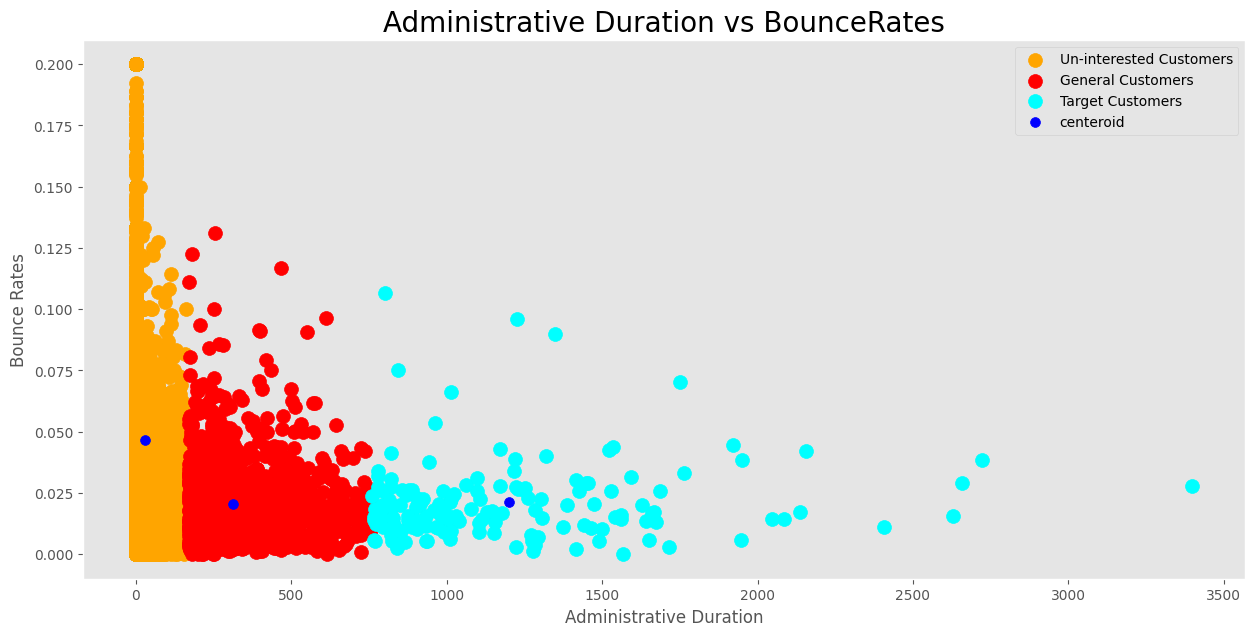

In [15]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.title('Administrative Duration vs BounceRates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

From all the analysis we've performed in this chapter, we can conclude the following:
- The conversion rates of new visitors are high compared to those of
returning customers.
- While the number of returning customers to the website is high, the conversion rate is low compared to that of new customers.
- Pages with a high page value have a lower bounce rate. We should be talking with our tech team to find ways to improve the page value of the web pages.

These factors will largely influence the next plan of action and open new avenues for more research and new business strategies and plans.